In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:
df = pd.read_csv('event_type_entity_extract_train.csv', header=None)
df.columns = ['index', 'content', 'label', 'entity']

In [23]:
df

,index,content,label,entity
0,204199,股价连续涨停后大股东拟减持 双一科技涉嫌提前泄露未公开信息、炒作股价配合股东减持遭深交所问询...,资金账户风险,酒鬼酒
1,103453,在搜索引擎输入.尚赫”就可以发现多篇.尚赫涉嫌传销”.虚假宣传”.跨区经营”等各类媒体公开...,涉嫌欺诈,尚赫
2,206305,综艺股份:大兴服装拟减持公司不超2%股份科新机电(300092)上市后业绩变脸 实际控制人拟...,业绩下滑,科新机电
3,201979,四川双马(000935)待注资产再“缩水” 盈利预测下滑广电运通(002152)减持股份退出...,业绩下滑,四川双马
4,103106,宝象金融涉嫌自融，项目造假，请停止犯罪！?各人看到没有，信达金控没有一个字的介绍，又是一个套路,涉嫌欺诈,宝象金融
...,...,...,...,...
17810,101719,今年以来，包括杭州鼎家公寓、上海寓见公寓、北京昊园恒业、北京爱佳心仪等在内的多家长租公寓出...,失联跑路,上海寓见公寓
17811,200477,员工协助地方政府空气数据造假 先河环保遭深交所问询住维资金:“漏洞”“黑洞”如何解,财务造假,先河环保
17812,205050,高新发展(000628)董秘短线交易自家股票被处罚大江股份(600695)股东受让大股东减持...,交易违规,高新发展
17813,205514,厚能股份(835695)副总经理卜相楠辞职核心子公司停产隐瞒不报 贤成矿业(600381)涉...,信批违规,贤成矿业


In [24]:
unique_labels = df['label'].unique()

temp = {}
for i in range(len(unique_labels)):
    temp[unique_labels[i]] = i
np.save('label2index.npy', temp)

with open('class.txt', 'w') as f:
    for i in range(len(unique_labels)):
        f.write(str(i)+"\n")

In [25]:
data = df[['content', 'label']]
# data.head

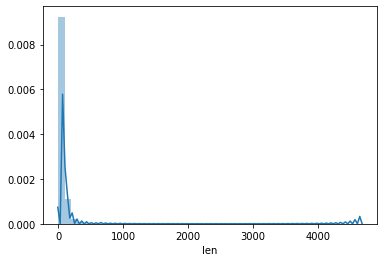

In [26]:
length = [len(list(x)) for x in df['content']]
lengths = np.array(length)
df['len'] = length
sns.distplot(df['len'])

In [27]:
for i in range(data.shape[0]):
    sentence = data['content'][i]
    if length[i] > 512:
        data['content'][i] = ''.join(list(sentence)[:511])


In [28]:
data['label'] = data['label'].replace(temp)

In [29]:
length = int(data.shape[0] * 0.8)
data[:length].to_csv('train.txt', sep='\t', index=False, header=False)
data[length:].to_csv('test.txt', sep='\t', index=False, header=False)
data[length:].to_csv('dev.txt', sep='\t', index=False, header=False)